In [38]:
import pandas as pd

# Load the Excel file into a DataFrame
excel_file_path = 'C:/Users/baha eddine/Desktop/PCD2/Multiphased_feature_selection/DS_feature_selection.xlsx'
df = pd.read_excel(excel_file_path)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_countplot(feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature)
    plt.title('Countplot of {}'.format(feature.name))
    plt.xlabel(feature.name)
    plt.ylabel('Count')
    plt.show()

 # For illustration,
let the total sample be 100. Then, in the random sampling method, five data samples are
selected randomly (assuming that each element would have an equal probability of being
identified as a refactoring class) from the total samples. In contrast, merely five samples
from ninety-five non-refactoring samples are considered in downsampling.
On the contrary, to perform upsampling, a small data element (say five) is extrapolated
or augmented into the large scale (say, ninety-five to constitute one-hundred samples) nonrefactoring data samples.

So in other words: 
 he takes every time 5% ( 5 samples) and 95% as (95 samples)

In [40]:
num_samples = len(df)
print("Number of samples in DataFrame:", num_samples)
df.shape


Number of samples in DataFrame: 4753


(4753, 25)

# Random Sampling

In [59]:
# Random Sampling
n1=(num_samples*5)/100
print(n1)
n1=int(n1)
random_sample = df.sample(n=n1)

237.65


In [60]:
yes_samples=len(random_sample[random_sample['Refact_Sum'] == 1])

print(f'the number of refactoring samples is {yes_samples}')

the number of refactoring samples is 8


In [61]:
random_sample.describe()


,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CLOC,...,NLM,NLPM,NOS,TLLOC,TLOC,TNLG,TNLM,TNLPM,TNOS,Refact_Sum
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.848101,1.050633,0.978903,11.430380,4.978903,3.219409,3.898734,5.590717,11.067511,12.839662,...,5.476793,4.459916,37.843882,71.814346,97.489451,1.476793,6.995781,5.789030,42.362869,0.033755
std,3.133020,1.398232,1.219361,28.042349,10.555522,9.394957,14.162132,20.288314,27.522173,39.136328,...,8.620807,7.505611,201.596396,260.464138,339.302520,4.086523,12.727089,11.409825,214.343467,0.180981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,10.000000,12.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,0.000000,1.000000,5.000000,3.000000,...,3.000000,2.000000,9.000000,28.000000,37.000000,0.000000,3.000000,3.000000,10.000000,0.000000
75%,2.000000,2.000000,2.000000,11.000000,5.000000,2.000000,2.000000,5.000000,11.000000,10.000000,...,6.000000,5.000000,25.000000,65.000000,86.000000,2.000000,7.000000,6.000000,33.000000,0.000000
max,34.000000,8.000000,5.000000,323.000000,124.000000,115.000000,137.000000,223.000000,299.000000,452.000000,...,76.000000,67.000000,3036.000000,3785.000000,4888.000000,42.000000,105.000000,93.000000,3207.000000,1.000000


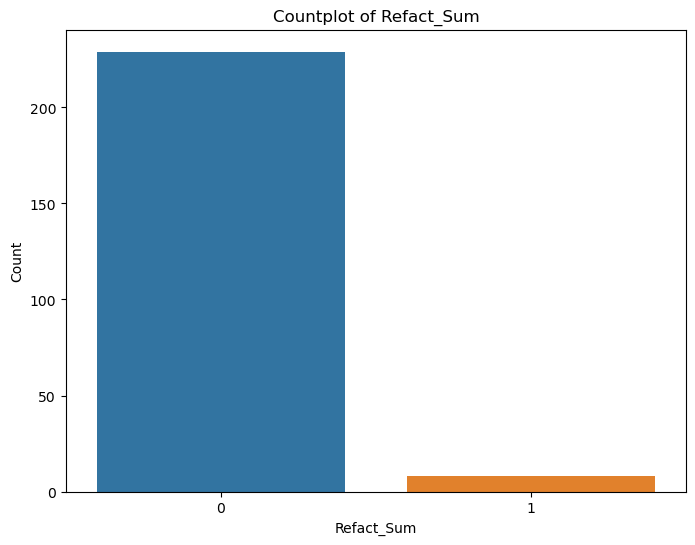

In [62]:
plot_countplot(random_sample['Refact_Sum'])


In [63]:
# Save the DataFrame to an Excel file 
df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Data_sampling/Random_sampling.xlsx', index=False)

#  DownSampling
In summary, this code section is downsampling the non-refactoring samples by randomly selecting 5% (n1) samples from the non-refactoring samples and then concatenating them with all the refactoring samples to create a balanced dataset.

In [64]:
# Downsampling
refactoring_samples = df[df['Refact_Sum'] == 1]
non_refactoring_samples = df[df['Refact_Sum'] != 1]
downsampled_non_refactoring = non_refactoring_samples.sample(n=n1)
downsampled_df = pd.concat([refactoring_samples, downsampled_non_refactoring])
downsampled_df.shape

(312, 25)

In [67]:
yes_samples=len(downsampled_df[downsampled_df['Refact_Sum'] == 1])

print(f'the number of refactoring samples is {yes_samples}')

the number of refactoring samples is 75


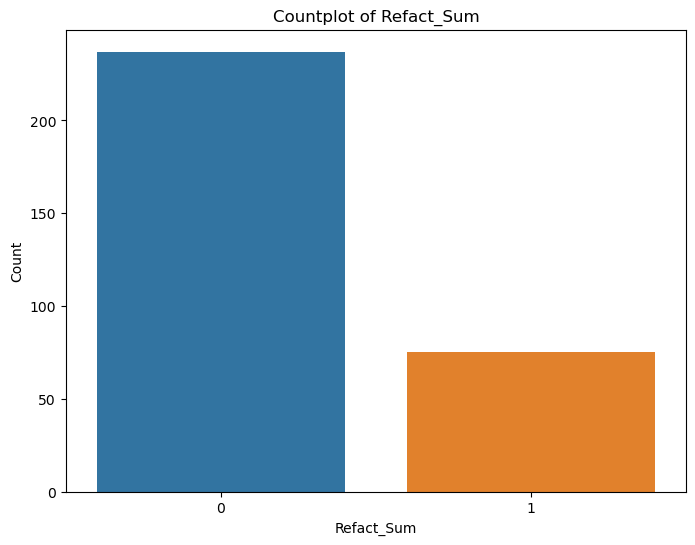

In [68]:
plot_countplot(downsampled_df['Refact_Sum'])


In [69]:
# Save the DataFrame to an Excel file 
downsampled_df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Data_sampling/down_sampling.xlsx', index=False)

# Upsampling
this code section is upsampling the non-refactoring samples by randomly selecting samples with replacement from the non-refactoring samples until the number of selected samples matches the count of refactoring samples. Then, it concatenates the refactoring samples with the upsampled non-refactoring samples to create a balanced dataset.

In [70]:
# Upsampling
refactoring_count = refactoring_samples.shape[0]
non_refactoring_count = non_refactoring_samples.shape[0]
upsampled_non_refactoring = non_refactoring_samples.sample(n=refactoring_count, replace=True)
upsampled_df = pd.concat([refactoring_samples, upsampled_non_refactoring])
upsampled_df.shape

(150, 25)

In [71]:
yes_samples=len(upsampled_df[upsampled_df['Refact_Sum'] == 1])

print(f'the number of refactoring samples is {yes_samples}')

the number of refactoring samples is 75


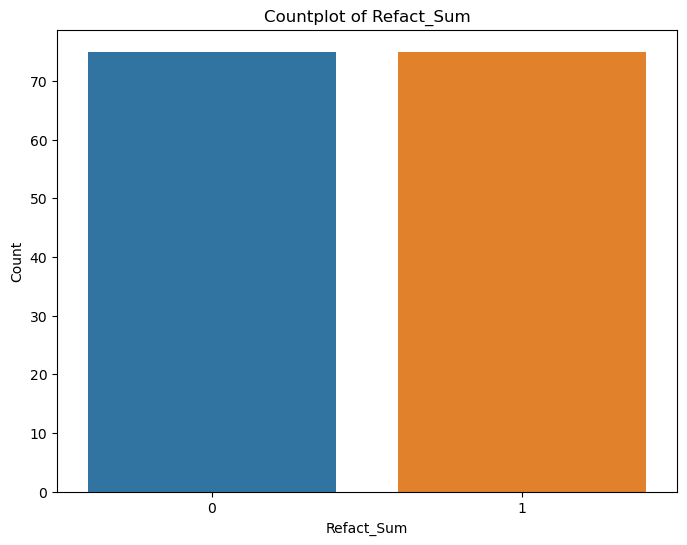

In [72]:
plot_countplot(upsampled_df['Refact_Sum'])


In [73]:
# Save the DataFrame to an Excel file 
upsampled_df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Data_sampling/Up_sampling.xlsx', index=False)

# then we need to combine all of the 4 datasets to obtain our final DS

In [75]:
# Combine the DataFrames
combined_df = pd.concat([upsampled_df, downsampled_df, random_sample, df], ignore_index=True)

combined_df.shape

(5452, 25)

Our original df:

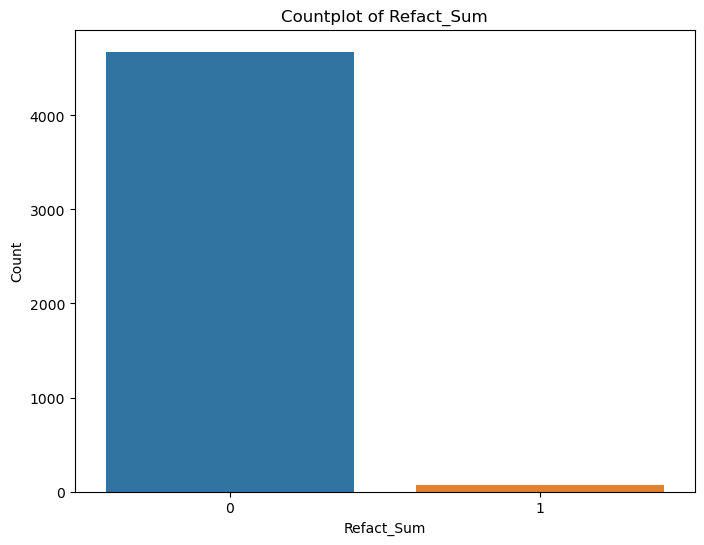

In [76]:
plot_countplot(df['Refact_Sum'])

after data_sampling:

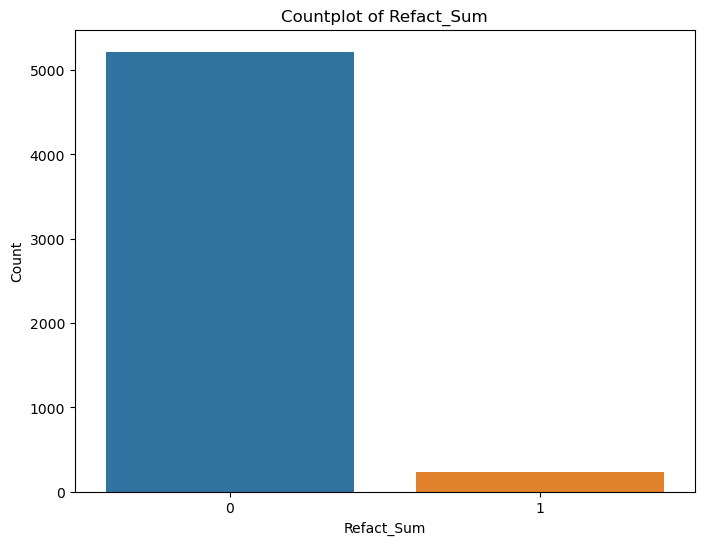

In [77]:
plot_countplot(combined_df['Refact_Sum'])

In [78]:
# Save the DataFrame to an Excel file 
combined_df.to_excel('C:/Users/baha eddine/Desktop/PCD2/Data_sampling/finalData_sampling.xlsx', index=False)

In [1]:
!pip install imblearn
